In [3]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/75-pix/images.npy
/kaggle/input/75-pix/labels.npy


In [4]:
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from tensorflow.keras.optimizers import Adam, Adagrad
from tensorflow.keras.initializers import HeUniform, GlorotUniform
import pandas as pd
import keras


In [5]:


import matplotlib.pyplot as plt
import numpy as np



def dataset_view(X,y):
    pass

def load_data(X,y):
    pass


def custom_loss():
    pass

def minutes_labels(labels):
    #convert into 720 classes, 
    pass

def model_classify():
    pass

images = np.load("/kaggle/input/75-pix/images.npy")
labels = np.load("/kaggle/input/75-pix/labels.npy")



In [6]:
images.shape

(18000, 75, 75)

In [7]:
## Check the head times available

unique_heads = {t[0] for t in labels}
print(unique_heads)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11}


In [8]:
#Starting with classification

class Dataset_prep():
    def __init__(self, X_train,X_valid, y_train, y_valid, input_shape)-> None:
        self.input_shape = input_shape
        self.X_train = X_train
        self.X_valid = X_valid
        self.y_train = y_train
        self.y_valid = y_valid
        
        
# Define the function to map (hour, minute) tuples to categories
def time_to_category(time_tuple):
    hour, minute = time_tuple
    # Determine the category based on the minute
    if minute < 30:
        category = hour * 2  # First half-hour of the hour
    else:
        category = hour * 2 + 1  # Second half-hour of the hour

    # Return the category in range [0, 23]
    return category % 24

img_rows, img_cols = 75, 75  #pixel size

# Example usage
list_of_times = labels
categories = [time_to_category(time) for time in list_of_times]
classes = list(set(categories))  #classes 
new_labels = np.array(categories)

#images = (images - images.mean())/images.std()
X_train, X_test,y_train,  y_test = train_test_split(images, new_labels, stratify=new_labels, test_size=0.10, random_state=42) 

split_index = int(0.1 * len(X_train))  # 10% of the data
X_train = X_train.astype('float32')

X_valid = X_train[:split_index]/255.0
X_train = X_train[split_index:]/255.0

y_valid = y_train[:split_index]
y_train = y_train[split_index:]



# lets start the initilization for layer, come on!

batch_size = 64
num_classes = len(classes)
epochs = 12

if K.image_data_format() == 'channels_first':
    X_train = X_train.reshape(X_train.shape[0], 1, img_rows, img_cols)
    X_valid = X_valid.reshape(X_valid.shape[0], 1, img_rows, img_cols)
    input_shape = (1, img_rows, img_cols)
else:
    X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
    X_valid = X_valid.reshape(X_valid.shape[0], img_rows, img_cols, 1)
    input_shape = (img_rows, img_cols, 1)

    
print(X_train.shape)
print(X_valid.shape)
 

dataset_p = Dataset_prep(X_train,X_valid, y_train, y_valid, input_shape)
    

(14580, 75, 75, 1)
(1620, 75, 75, 1)


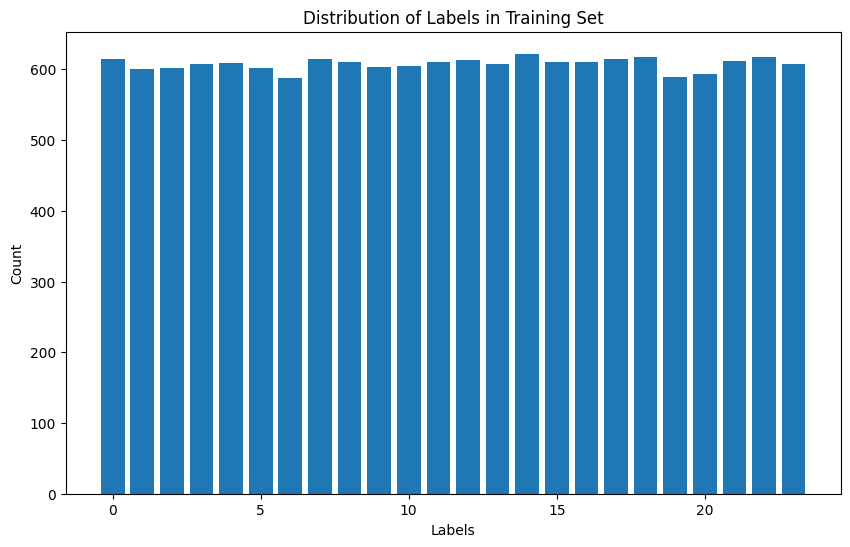

In [9]:
import numpy as np
import matplotlib.pyplot as plt


# Assuming y_train contains your labels
labels, counts = np.unique(y_train, return_counts=True)

# Plotting the distribution
plt.figure(figsize=(10, 6))
plt.bar(labels, counts)
plt.xlabel('Labels')
plt.ylabel('Count')
plt.title('Distribution of Labels in Training Set')
plt.show()


In [10]:
X_test = X_test.astype('float32')
X_test = X_test/255.0
X_test = X_test.reshape(X_test.shape[0],  img_rows, img_cols, 1)

/opt/conda/lib/python3.10/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 75, 75, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 75, 75, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 75, 75, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 37, 37, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 37, 37, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 37, 37, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 37, 37, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 18, 18, 32)     │        18,464 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 18, 18, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 18, 18, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 18, 18, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_6           │ (None, 9, 9, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼─────────────

 Total params: 450,328 (1.72 MB)

 Trainable params: 449,112 (1.71 MB)

 Non-trainable params: 1,216 (4.75 KB)

Epoch 1/400


I0000 00:00:1730645146.418460     105 service.cc:145] XLA service 0x7c64580091d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1730645146.418501     105 service.cc:153]   StreamExecutor device (0): Tesla T4, Compute Capability 7.5
I0000 00:00:1730645146.418504     105 service.cc:153]   StreamExecutor device (1): Tesla T4, Compute Capability 7.5


  4/228 ━━━━━━━━━━━━━━━━━━━━ 10s 47ms/step - accuracy: 0.0524 - loss: 3.9896 

I0000 00:00:1730645162.428134     105 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


228/228 ━━━━━━━━━━━━━━━━━━━━ 45s 102ms/step - accuracy: 0.0432 - loss: 3.7665 - val_accuracy: 0.0451 - val_loss: 2.7705
Epoch 2/400


/opt/conda/lib/python3.10/site-packages/keras/src/saving/serialization_lib.py:390: UserWarning: The object being serialized includes a `lambda`. This is unsafe. In order to reload the object, you will have to pass `safe_mode=False` to the loading function. Please avoid using `lambda` in the future, and use named Python functions instead. This is the `lambda` being serialized:         loss=lambda y_true, y_pred: circular_loss(y_true, y_pred, num_classes=num_classes),

  return {key: serialize_keras_object(value) for key, value in obj.items()}


228/228 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.0417 - loss: 3.6264 - val_accuracy: 0.0463 - val_loss: 2.8988
Epoch 3/400
228/228 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.0418 - loss: 3.5223 - val_accuracy: 0.0451 - val_loss: 2.7703
Epoch 4/400
228/228 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.0399 - loss: 3.4162 - val_accuracy: 0.0420 - val_loss: 2.7817
Epoch 5/400
228/228 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.0396 - loss: 3.3616 - val_accuracy: 0.0488 - val_loss: 2.7823
Epoch 6/400
228/228 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.0478 - loss: 3.2546 - val_accuracy: 0.0463 - val_loss: 2.8302
Epoch 7/400
228/228 ━━━━━━━━━━━━━━━━━━━━ 7s 30ms/step - accuracy: 0.0443 - loss: 3.2058 - val_accuracy: 0.0562 - val_loss: 2.9442
Epoch 8/400
228/228 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.0428 - loss: 3.1564 - val_accuracy: 0.0512 - val_loss: 2.9659
Epoch 9/400
228/228 ━━━━━━━━━━━━━━━━━━━━ 7s 31ms/step - accuracy: 0.0432 - loss: 3.0943 - val_accuracy

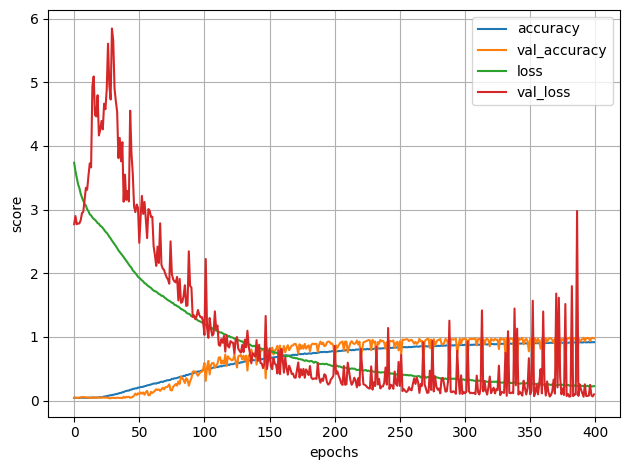

In [11]:
import tensorflow as tf


class DisplayPredictionsCallback(tf.keras.callbacks.Callback):
    def __init__(self, validation_data):
        super().__init__()
        self.validation_data = validation_data

    def on_epoch_end(self, epoch, logs=None):
        # Run predictions on a small batch of validation data
        sample_batch, _ = self.validation_data  # Get validation images and labels
        predictions = self.model.predict(sample_batch[:5])  # Predict on first 5 samples
        print(f"Epoch {epoch + 1} predictions:", predictions)  # Display first 5 predictions


def circular_loss(y_true, y_pred, num_classes=24):
    ce_loss = tf.keras.losses.sparse_categorical_crossentropy(y_true, y_pred)
    
    # Circular loss component for temporal/cyclic structure
    theta_true = 2 * np.pi * tf.cast(y_true, tf.float32) / num_classes
    class_indices = tf.range(num_classes, dtype=tf.float32)
    theta_pred = 2 * np.pi * tf.reduce_sum(class_indices * y_pred, axis=-1) / num_classes
    cos_similarity = tf.cos(theta_true - theta_pred)
    circular_loss = 1 - cos_similarity
    
    # Calculate mean values to get the relative scale of each loss component
    ce_loss_mean = tf.reduce_mean(ce_loss)
    circular_loss_mean = tf.reduce_mean(circular_loss)
    total_mean = ce_loss_mean + circular_loss_mean

    # Use tf.cond to handle the alpha calculation dynamically within the graph
    alpha = tf.cond(total_mean > 0, 
                    lambda: ce_loss_mean / total_mean,  # Proportional weight for ce_loss
                    lambda: 0.5)  # Fallback value if total_mean is zero
    
    # Combine the two losses with dynamically calculated alpha
    combined_loss = alpha * ce_loss + (1 - alpha) * circular_loss
    return combined_loss



from tensorflow.keras.layers import BatchNormalization
def build_model(input_shape):
    num_classes = 24
    
    model = Sequential()

    # Convolutional Block 1
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape, padding="same", kernel_initializer=GlorotUniform()))
    model.add(BatchNormalization())
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer=GlorotUniform()))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Convolutional Block 2
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer=HeUniform()))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer=HeUniform()))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.3))

    # Convolutional Block 3
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer=HeUniform()))
    model.add(BatchNormalization())
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer=HeUniform()))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.4))

    # Optional: Convolutional Block 4
    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding="same", kernel_initializer=HeUniform()))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.5))

    # Flatten and Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu', kernel_initializer=GlorotUniform()))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))
    model.add(Dense(64, activation='relu', kernel_initializer=GlorotUniform()))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(num_classes, activation='softmax', kernel_initializer=GlorotUniform()))

    """
    model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
                  
        loss="sparse_categorical_crossentropy",
                  #loss=lambda y_true, y_pred: custom_cyclic_loss(y_true, y_pred, num_classes=24),
                  #optimizer = Adam(learning_rate=0.001),

                  metrics=['accuracy'])
    #model.compile(
    #               optimizer=keras.optimizers.Adam(learning_rate=0.001),
    #               #optimizer = Adam(learning_rate=0.001),
    #               loss = lambda y_true, y_pred: custom_loss(y_true, y_pred),
    #               metrics=['accuracy'])
    """
    model.compile(
        optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
        loss=lambda y_true, y_pred: circular_loss(y_true, y_pred, num_classes=num_classes),
        #loss="sparse_categorical_crossentropy",
        metrics=['accuracy']
    )

    return model


def train_model(model):
    validation_sample = (X_valid[:5], y_valid[:5])  # Use first 5 samples for demonstration
    

    # history = model.fit(X_train, y_train,
    #           batch_size=batch_size,
    #           epochs=epochs,
    #           verbose=1,
    #           validation_data=(X_valid, y_valid))




    checkpoint_cb = keras.callbacks.ModelCheckpoint(
        "classifier_model.keras", save_best_only=True
    )
    early_stopping_cb = keras.callbacks.EarlyStopping(monitor='loss',
        patience=10, restore_best_weights=True
    )
    history = model.fit(X_train, y_train, batch_size = batch_size, epochs=400,validation_data = (X_valid, y_valid), callbacks=[checkpoint_cb, early_stopping_cb])
    model.save('final_model.keras')
    data_history = pd.DataFrame(history.history)
    #history_model_data = pd.DataFrame(data_history).plot(figsize= (8,5))
#     plt.grid(True)
#     plt.gca().set_ylim(0,1) #set the limit on y axis values - we are cheecking loss and accuracy hence from 0 to 1
#     plt.xlabel('epochs')
#     plt.ylabel('score')
#     plt.tight_layout()
#     plt.show()
    plt.plot(history.history['accuracy'], label='accuracy')
    plt.plot(history.history['val_accuracy'], label='val_accuracy')
    plt.plot(history.history['loss'], label='loss')
    plt.plot(history.history['val_loss'], label='val_loss')
    plt.xlabel('epochs')
    plt.ylabel('score')
    plt.legend(loc="best")

    # Adjust y-axis limits if necessary
    # plt.ylim(0, 1)  # Uncomment if you want to set limits for accuracy between 0 and 1

    plt.grid(True)
    plt.tight_layout()
    plt.show()
    data_history.to_csv("train report.csv")
    return data_history

model = build_model(input_shape= input_shape)
model.summary()


history = train_model(model)



In [17]:
from tensorflow.keras.models import load_model

# Load the entire model

model = load_model("classifier_model.keras", safe_mode = False)

In [18]:
def predict_time():
    pass

predictions =  model.predict(X_test)
predicted_classes = predictions.argmax(axis =1)

57/57 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step


In [22]:
print(y_test[0])
print(predicted_classes[0])
predictions[0]

6
6


array([3.8407539e-09, 2.4512616e-12, 1.1726202e-05, 1.0339397e-09,
       1.0757392e-02, 1.5577485e-06, 9.7829926e-01, 1.6464537e-07,
       1.0929142e-02, 6.9295580e-10, 8.2385833e-07, 1.7012856e-11,
       1.4730094e-10, 3.8834304e-11, 9.8395701e-11, 2.7035590e-10,
       2.4103429e-11, 2.2677006e-11, 7.1622942e-12, 2.3703717e-12,
       1.8111023e-11, 2.2835375e-12, 4.0412874e-11, 1.5175762e-12],
      dtype=float32)

In [20]:
print(predicted_classes)

[ 6 15 22 ...  7 23 13]


In [21]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Calculate accuracy
accuracy = accuracy_score(y_test, predicted_classes)
print("Accuracy:", accuracy)

# Detailed classification report (precision, recall, F1-score for each class)
print("Classification Report:\n", classification_report(y_test, predicted_classes))

# Confusion matrix for further insight
conf_matrix = confusion_matrix(y_test, predicted_classes)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9872222222222222
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.99      0.98        75
           1       0.97      0.96      0.97        75
           2       0.97      0.97      0.97        75
           3       0.99      1.00      0.99        75
           4       1.00      0.97      0.99        75
           5       0.99      1.00      0.99        75
           6       0.97      1.00      0.99        75
           7       1.00      1.00      1.00        75
           8       0.99      0.99      0.99        75
           9       1.00      1.00      1.00        75
          10       0.99      0.99      0.99        75
          11       1.00      0.97      0.99        75
          12       0.99      1.00      0.99        75
          13       0.99      1.00      0.99        75
          14       1.00      1.00      1.00        75
          15       1.00      0.97      0.99        75
          16       0.97     